In [1]:
import torch

model_name_small = 'efficientnet_v2_s'
weight_path_small = 'Weights/efficientnet_v2_s_cifar100.pth'
model_small = torch.hub.load('hankyul2/EfficientNetV2-pytorch', model_name_small, nclass=100, skip_validation=True)
model_small.load_state_dict(torch.load(weight_path_small))

Using cache found in /home/ubuntu/.cache/torch/hub/hankyul2_EfficientNetV2-pytorch_main
/tmp/ipykernel_16510/2218925871.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  m

<All keys matched successfully>

In [2]:
model_name_medium = 'efficientnet_v2_m'
weight_path_medium = 'Weights/efficientnet_v2_m_cifar100.pth'
model_medium = torch.hub.load('hankyul2/EfficientNetV2-pytorch', model_name_medium, nclass=100, skip_validation=True)
model_medium.load_state_dict(torch.load(weight_path_medium))

Using cache found in /home/ubuntu/.cache/torch/hub/hankyul2_EfficientNetV2-pytorch_main
/tmp/ipykernel_16510/3324523295.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  m

<All keys matched successfully>

In [3]:
model_name_large = 'efficientnet_v2_l'
weight_path_large = 'Weights/efficientnet_v2_l_cifar100.pth'
model_large = torch.hub.load('hankyul2/EfficientNetV2-pytorch', model_name_large, nclass=100, skip_validation=True)
model_large.load_state_dict(torch.load(weight_path_large))

Using cache found in /home/ubuntu/.cache/torch/hub/hankyul2_EfficientNetV2-pytorch_main
/tmp/ipykernel_16510/3612859344.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  m

<All keys matched successfully>

In [4]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from torchvision import transforms

mean = (0.5071, 0.4865, 0.4409)
std = (0.2673, 0.2564, 0.2762)

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std) 
])

In [6]:
batch_size = 256
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, transform=test_transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified


In [7]:
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy


In [8]:
def visualize_predictions(model, dataset, indices_to_visualize=[0, 10, 20]):
    model.eval()
    for idx in indices_to_visualize:
        img, label = dataset[idx]
        img = img.to(device)
        img_unnormalized = img.mul(torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1).to(device)) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1).to(device)
        img_unnormalized = img_unnormalized.clamp(0, 1).cpu().numpy().transpose(1, 2, 0)
        
        output = model(img.unsqueeze(0))
        prediction = output.argmax(dim=1).item()
        
        plt.imshow(img_unnormalized)
        plt.title(f"Predicted: {prediction}, True: {label}")
        plt.axis('off')
        plt.show()

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_small.to(device)
model_medium.to(device)
model_large.to(device)

EfficientNetV2(
  (stem): ConvBNAct(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU()
  )
  (blocks): Sequential(
    (0): MBConv(
      (block): Sequential(
        (fused): ConvBNAct(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU()
        )
      )
      (stochastic_path): StochasticDepth()
    )
    (1): MBConv(
      (block): Sequential(
        (fused): ConvBNAct(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU()
        )
      )
      (stochastic_path): StochasticDepth()
    )
    (2): MBConv(
      (block): Sequential(
  

In [10]:
accuracy_small = evaluate_model(model_small, test_loader)
accuracy_medium = evaluate_model(model_medium, test_loader)
accuracy_large = evaluate_model(model_large, test_loader)

In [11]:
print(f"{accuracy_small=}%")
print(f"{accuracy_medium=}%")
print(f"{accuracy_large=}%")

accuracy_small=90.96%
accuracy_medium=91.53%
accuracy_large=91.88%


visualize efficientnet_v2_s predictions


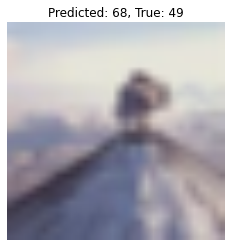

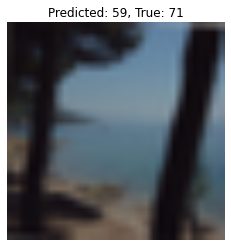

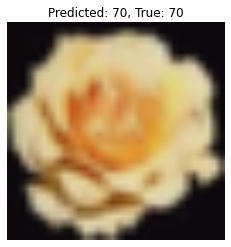

In [12]:
print("visualize efficientnet_v2_s predictions")
visualize_predictions(model_small, test_dataset, indices_to_visualize=[0, 10, 20])

visualize efficientnet_v2_m predictions


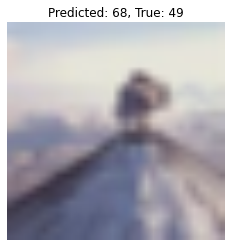

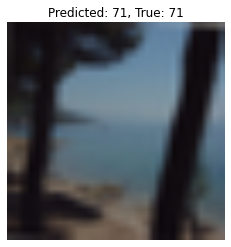

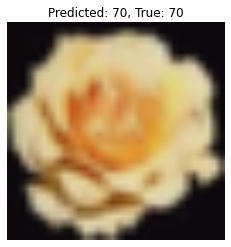

In [13]:
print("visualize efficientnet_v2_m predictions")
visualize_predictions(model_medium, test_dataset, indices_to_visualize=[0, 10, 20])

visualize efficientnet_v2_l predictions


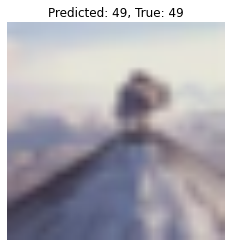

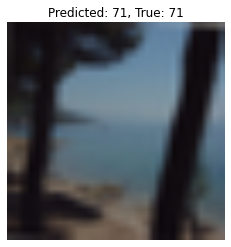

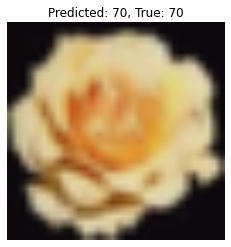

In [14]:
print("visualize efficientnet_v2_l predictions")
visualize_predictions(model_large, test_dataset, indices_to_visualize=[0, 10, 20])